In [7]:
# import packages
import numpy as np
import pandas as pd

import warnings # for supressing a warning when importing large files
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
# !pip install simple-venn
from simple_venn import venn2, venn3, venn4 # for charting venn diagrams
from itertools import combinations



# import own scripts
import sys
%reload_ext autoreload
sys.path.insert(0, '/healthcare-fraud/src/')
import scripts as src

# Exploring the Data
---
> **LEIE**: The Office of the Inspector General's (OIG) `List of Excluded Individuals/Entities` (LEIE) provides information to the health care industry, patients and the public regarding individuals and entities currently excluded from participation in Medicare, Medicaid and all other Federal health care programs.
>
> **PartD**: The Part D Prescriber `Public Use File` (PUF) provides information on `prescription drugs` prescribed by individual physicians and other health care providers and paid for under the Medicare Part D Prescription Drug Program. 

In [3]:
# import data
LEIE = src.read_from_efs('raw_LEIE.csv').reset_index(drop=True)
print('LEIE shape: ', LEIE.shape)
print('LEIE size: ', src.get_size(LEIE))
LEIE.tail()

LEIE shape:  (70056, 18)
LEIE size:  10.09 Mb


LASTNAME   FIRSTNAME MIDNAME BUSNAME               GENERAL  \
70051   ZWOLINSKI     RUSSELL      K      NaN  MEDICAL PRACTICE, MD   
70052   ZYDERVELD        MARY    ANN      NaN              PHARMACY   
70053     ZYLSTRA  CHRISTEENA   LYNN      NaN    NURSING PROFESSION   
70054     ZYLSTRA       JAMES  PETER      NaN  REHAB FACILITY - GEN   
70055  ZYWOCINSKI     CYNTHIA      A      NaN      OSTEOPATHIC PRAC   

               SPECIALTY    UPIN  NPI         DOB                   ADDRESS  \
70051            SURGERY  G25488    0  19670330.0       1728 W WINNEMAC AVE   
70052         TECHNICIAN     NaN    0  19520825.0   1358 MORNING GLORY TURN   
70053  NURSE/NURSES AIDE     NaN    0  19670724.0       1816 NE 49TH STREET   
70054           EMPLOYEE     NaN    0  19550420.0  2305 MINNESOTA BLVD, S E   
70055         OSTEOPATHY  F00244    0  19630316.0       117 WHITE TAIL LANE   

               CITY STATE    ZIP EXCLTYPE  EXCLDATE  REINDATE  WAIVERDATE  \
70051       CHICAGO    IL  60618   1128b4  20031020         0           0   
70052  RUCKERSVILLE    VA  22962   1128b4  20090219         0           0   
70053   KANSAS CITY    MO  64118   1128b4  20100318         0           0   
70054      ST CLOUD    MN  56304   1128a2  20040920         0           0   
70055     LANCASTER    MA   1523  1128b14  19990720         0           0   

      WVRSTATE  
70051      NaN  
70052      NaN  
70053      NaN  
70054      NaN  
70055      NaN

In [5]:
PartD = src.read_from_efs('raw_PartD.csv').reset_index(drop=True)
print('PartD shape: ', PartD.shape)
print('LEIE size: ', src.get_size(PartD))
PartD.tail()

MemoryError: 

In [10]:
LEIE_clean = src.get_intersection_by_npi(LEIE, PartD)

print('LEIE_clean shape: ', LEIE_clean.shape)
LEIE_clean.tail()

NameError: name 'LEIE' is not defined

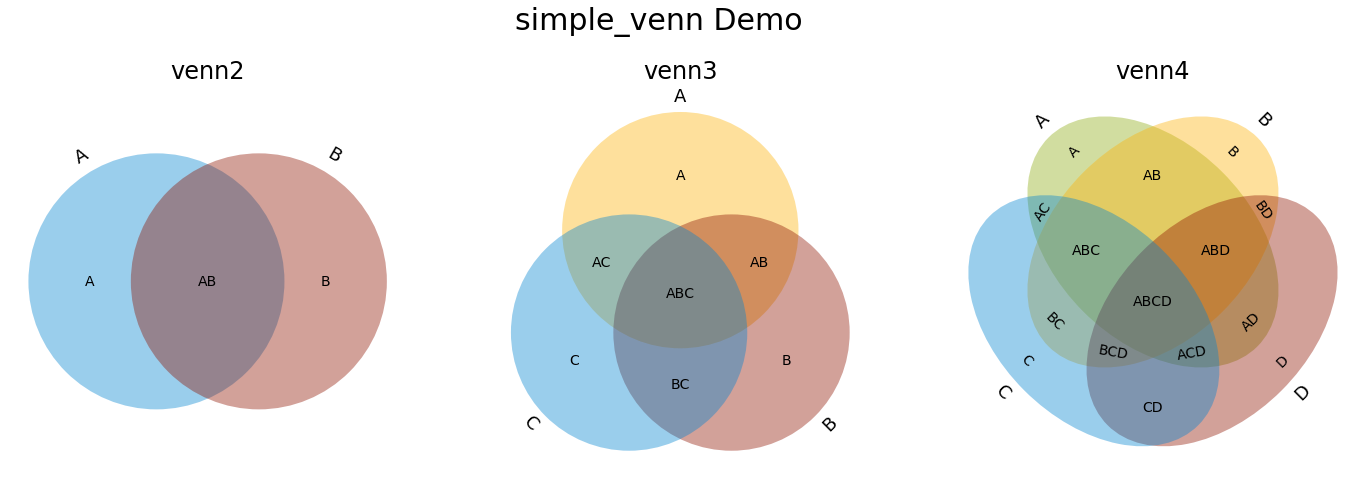

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# two-way venn
sets = 'A B'.split()
subsets = [''.join(combo) for i in range(1, 3) for combo in combinations(sets, i)]
ax = axes[0]
venn2(subsets, ax=ax)
ax.set_title('venn2', fontsize=24)

# three-way venn
sets = 'A B C'.split()
subsets = [''.join(combo) for i in range(1, 4) for combo in combinations(sets, i)]
ax = axes[1]
venn3(subsets, ax=ax)
ax.set_title('venn3', fontsize=24)

# four-way venn
sets = 'A B C D'.split()
subsets = [''.join(combo) for i in range(1, 5) for combo in combinations(sets, i)]
ax = axes[2]
venn4(subsets, ax=ax)
ax.set_title('venn4', fontsize=24)

fig.suptitle('simple_venn Demo', fontsize=30)
plt.savefig('demo.png', bbox_inches='tight')

In [7]:
PartD_excl = PartD[PartD['npi'].isin(common_npi)].drop_duplicates().reset_index(drop=True)
print('PartD_excl shape: ', PartD_excl.shape)
PartD_excl.tail()

PartD_excl shape:  (121096, 22)


npi nppes_provider_last_org_name nppes_provider_first_name  \
121091  1982782900                        EVANS                   RICHARD   
121092  1982782900                        EVANS                   RICHARD   
121093  1982782900                        EVANS                   RICHARD   
121094  1982782900                        EVANS                   RICHARD   
121095  1992720700                     BEAUMONT                    GRAHAM   

       nppes_provider_city nppes_provider_state  \
121091             HOUSTON                   TX   
121092             HOUSTON                   TX   
121093             HOUSTON                   TX   
121094             HOUSTON                   TX   
121095           SAN MATEO                   CA   

                       specialty_description description_flag       drug_name  \
121091  Physical Medicine and Rehabilitation                S       MELOXICAM   
121092  Physical Medicine and Rehabilitation                S   OXYCODONE HCL   
121093  Physical Medicine and Rehabilitation                S       OXYCONTIN   
121094  Physical Medicine and Rehabilitation                S  TIZANIDINE HCL   
121095                Psychiatry & Neurology                T      OLANZAPINE   

          generic_name  bene_count  ...   total_day_supply  total_drug_cost  \
121091       MELOXICAM         NaN  ...                840            90.56   
121092   OXYCODONE HCL         NaN  ...               1284          3857.25   
121093   OXYCODONE HCL         NaN  ...                435          7663.38   
121094  TIZANIDINE HCL         NaN  ...                510           305.07   
121095      OLANZAPINE         NaN  ...                516           257.64   

        bene_count_ge65  bene_count_ge65_suppress_flag  \
121091              NaN                              *   
121092              0.0                            NaN   
121093              0.0                            NaN   
121094              NaN                              *   
121095              0.0                            NaN   

        total_claim_count_ge65 ge65_suppress_flag  \
121091                     NaN                  *   
121092                     0.0                NaN   
121093                     0.0                NaN   
121094                    17.0                NaN   
121095                     0.0                NaN   

        total_30_day_fill_count_ge65 total_day_supply_ge65  \
121091                           NaN                   NaN   
121092                           0.0                   0.0   
121093                           0.0                   0.0   
121094                          17.0                 510.0   
121095                           0.0                   0.0   

        total_drug_cost_ge65  year  
121091                   NaN  2016  
121092                  0.00  2016  
121093                  0.00  2016  
121094                305.07  2016  
121095                  0.00  2016  

[5 rows x 22 columns]

In [35]:
PartD_ok = PartD[~PartD['npi'].isin(common_npi)].drop_duplicates().reset_index(drop=True)
PartD_ok['EXCLTYPE'] = np.nan
PartD_ok['EXCLDATE'] = np.nan
PartD_ok['REINDATE'] = np.nan

print('PartD_ok shape: ', PartD_ok.shape)
PartD_ok.tail()

PartD_ok shape:  (97138412, 25)


npi nppes_provider_last_org_name nppes_provider_first_name  \
97138407  1992999882             RUDZINSKI-WALTER                   MARISSA   
97138408  1992999882             RUDZINSKI-WALTER                   MARISSA   
97138409  1992999882             RUDZINSKI-WALTER                   MARISSA   
97138410  1992999882             RUDZINSKI-WALTER                   MARISSA   
97138411  1992999882             RUDZINSKI-WALTER                   MARISSA   

         nppes_provider_city nppes_provider_state specialty_description  \
97138407        WILKES BARRE                   PA   Physician Assistant   
97138408        WILKES BARRE                   PA   Physician Assistant   
97138409        WILKES BARRE                   PA   Physician Assistant   
97138410        WILKES BARRE                   PA   Physician Assistant   
97138411        WILKES BARRE                   PA   Physician Assistant   

         description_flag            drug_name         generic_name  \
97138407                S          LAMOTRIGINE          LAMOTRIGINE   
97138408                S  QUETIAPINE FUMARATE  QUETIAPINE FUMARATE   
97138409                S          RISPERIDONE          RISPERIDONE   
97138410                S       SERTRALINE HCL       SERTRALINE HCL   
97138411                S        TRAZODONE HCL        TRAZODONE HCL   

          bene_count    ...     bene_count_ge65_suppress_flag  \
97138407         NaN    ...                               NaN   
97138408         NaN    ...                               NaN   
97138409         NaN    ...                                 *   
97138410        13.0    ...                                 *   
97138411        16.0    ...                                 *   

          total_claim_count_ge65  ge65_suppress_flag  \
97138407                     0.0                 NaN   
97138408                     0.0                 NaN   
97138409                     NaN                   *   
97138410                     NaN                   *   
97138411                     NaN                   *   

          total_30_day_fill_count_ge65  total_day_supply_ge65  \
97138407                           0.0                    0.0   
97138408                           0.0                    0.0   
97138409                           NaN                    NaN   
97138410                           NaN                    NaN   
97138411                           NaN                    NaN   

         total_drug_cost_ge65  year EXCLTYPE  EXCLDATE  REINDATE  
97138407                  0.0  2016      NaN       NaN       NaN  
97138408                  0.0  2016      NaN       NaN       NaN  
97138409                  NaN  2016      NaN       NaN       NaN  
97138410                  NaN  2016      NaN       NaN       NaN  
97138411                  NaN  2016      NaN       NaN       NaN  

[5 rows x 25 columns]

In [16]:
def populate_exclusions(excl_npi):
    return LEIE_clean[['EXCLTYPE','EXCLDATE','REINDATE']][LEIE_clean['NPI'] == excl_npi].values.tolist()[0]

In [25]:
print("Number of available CPU cores: ")
!cat /proc/cpuinfo | grep processor | wc -l

Number of available CPU cores: 
64


In [26]:
from multiprocessing import Pool
!pip install tqdm
from tqdm import tqdm_notebook
import itertools

# find target indeces for target drugs using multiprocessing
processors = 64
if __name__ == '__main__':
    tasks = PartD_excl['npi']
    function = populate_exclusions
    with Pool(processes=processors)as p:
        results = list(tqdm_notebook(p.imap(function, tasks), total=len(tasks)))



distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [32]:
PartD_excl['EXCLTYPE'] = np.array(results).T[0]
PartD_excl['EXCLDATE'] = np.array(results).T[1]
PartD_excl['REINDATE'] = np.array(results).T[2]

In [45]:
PartD_excl['label'] = PartD_excl['year']<= pd.to_datetime(PartD_excl["EXCLDATE"], format="%Y%m%d").dt.year
PartD_ok['label'] = False

In [46]:
PartD_ok.head()

npi nppes_provider_last_org_name nppes_provider_first_name  \
0  1003000126                    ENKESHAFI                   ARDALAN   
1  1003000126                    ENKESHAFI                   ARDALAN   
2  1003000126                    ENKESHAFI                   ARDALAN   
3  1003000126                    ENKESHAFI                   ARDALAN   
4  1003000126                    ENKESHAFI                   ARDALAN   

  nppes_provider_city nppes_provider_state specialty_description  \
0          CUMBERLAND                   MD     Internal Medicine   
1          CUMBERLAND                   MD     Internal Medicine   
2          CUMBERLAND                   MD     Internal Medicine   
3          CUMBERLAND                   MD     Internal Medicine   
4          CUMBERLAND                   MD     Internal Medicine   

  description_flag                  drug_name            generic_name  \
0                S  ISOSORBIDE MONONITRATE ER  ISOSORBIDE MONONITRATE   
1                S               LEVOFLOXACIN            LEVOFLOXACIN   
2                S                 LISINOPRIL              LISINOPRIL   
3                S        METOPROLOL TARTRATE     METOPROLOL TARTRATE   
4                S                 PREDNISONE              PREDNISONE   

   bene_count  ...    total_claim_count_ge65  ge65_suppress_flag  \
0         NaN  ...                       NaN                   *   
1        26.0  ...                      15.0                 NaN   
2        17.0  ...                       NaN                   #   
3        28.0  ...                       NaN                   #   
4        14.0  ...                       NaN                   *   

   total_30_day_fill_count_ge65  total_day_supply_ge65  total_drug_cost_ge65  \
0                           NaN                    NaN                   NaN   
1                          15.0                  106.0                159.72   
2                           NaN                    NaN                   NaN   
3                           NaN                    NaN                   NaN   
4                           NaN                    NaN                   NaN   

   year  EXCLTYPE EXCLDATE  REINDATE  label  
0  2013       NaN      NaN       NaN  False  
1  2013       NaN      NaN       NaN  False  
2  2013       NaN      NaN       NaN  False  
3  2013       NaN      NaN       NaN  False  
4  2013       NaN      NaN       NaN  False  

[5 rows x 26 columns]

In [51]:
df = pd.concat([PartD_excl, PartD_ok], axis=0).sort_values(['year','npi']).reset_index(drop=True)
df.shape

(97259508, 26)

In [53]:
df.tail()

npi nppes_provider_last_org_name nppes_provider_first_name  \
97259503  1992999882             RUDZINSKI-WALTER                   MARISSA   
97259504  1992999882             RUDZINSKI-WALTER                   MARISSA   
97259505  1992999882             RUDZINSKI-WALTER                   MARISSA   
97259506  1992999882             RUDZINSKI-WALTER                   MARISSA   
97259507  1992999882             RUDZINSKI-WALTER                   MARISSA   

         nppes_provider_city nppes_provider_state specialty_description  \
97259503        WILKES BARRE                   PA   Physician Assistant   
97259504        WILKES BARRE                   PA   Physician Assistant   
97259505        WILKES BARRE                   PA   Physician Assistant   
97259506        WILKES BARRE                   PA   Physician Assistant   
97259507        WILKES BARRE                   PA   Physician Assistant   

         description_flag            drug_name         generic_name  \
97259503                S          LAMOTRIGINE          LAMOTRIGINE   
97259504                S  QUETIAPINE FUMARATE  QUETIAPINE FUMARATE   
97259505                S          RISPERIDONE          RISPERIDONE   
97259506                S       SERTRALINE HCL       SERTRALINE HCL   
97259507                S        TRAZODONE HCL        TRAZODONE HCL   

          bene_count  ...    total_claim_count_ge65  ge65_suppress_flag  \
97259503         NaN  ...                       0.0                 NaN   
97259504         NaN  ...                       0.0                 NaN   
97259505         NaN  ...                       NaN                   *   
97259506        13.0  ...                       NaN                   *   
97259507        16.0  ...                       NaN                   *   

          total_30_day_fill_count_ge65  total_day_supply_ge65  \
97259503                           0.0                    0.0   
97259504                           0.0                    0.0   
97259505                           NaN                    NaN   
97259506                           NaN                    NaN   
97259507                           NaN                    NaN   

          total_drug_cost_ge65  year  EXCLTYPE EXCLDATE  REINDATE  label  
97259503                   0.0  2016       NaN      NaN       NaN  False  
97259504                   0.0  2016       NaN      NaN       NaN  False  
97259505                   NaN  2016       NaN      NaN       NaN  False  
97259506                   NaN  2016       NaN      NaN       NaN  False  
97259507                   NaN  2016       NaN      NaN       NaN  False  

[5 rows x 26 columns]

## Compare between `excluded` and  `not excluded` prescribers `apples to apples`
---
> 1. consider records only by common `specialty_description`and
> 2. by common `generic_name`

In [ ]:
trgt_specialties = set(df['specialty_description'][df['label'] == True])
trgt_drugs = set(df['generic_name'][df['label'] == True])

In [61]:
df_trgt = df[(df['specialty_description'].isin(trgt_specialties))&\
             (df['generic_name'].isin(trgt_drugs))].reset_index(drop=True)
df_trgt.tail()

npi nppes_provider_last_org_name nppes_provider_first_name  \
94285115  1992999882             RUDZINSKI-WALTER                   MARISSA   
94285116  1992999882             RUDZINSKI-WALTER                   MARISSA   
94285117  1992999882             RUDZINSKI-WALTER                   MARISSA   
94285118  1992999882             RUDZINSKI-WALTER                   MARISSA   
94285119  1992999882             RUDZINSKI-WALTER                   MARISSA   

         nppes_provider_city nppes_provider_state specialty_description  \
94285115        WILKES BARRE                   PA   Physician Assistant   
94285116        WILKES BARRE                   PA   Physician Assistant   
94285117        WILKES BARRE                   PA   Physician Assistant   
94285118        WILKES BARRE                   PA   Physician Assistant   
94285119        WILKES BARRE                   PA   Physician Assistant   

         description_flag            drug_name         generic_name  \
94285115                S          LAMOTRIGINE          LAMOTRIGINE   
94285116                S  QUETIAPINE FUMARATE  QUETIAPINE FUMARATE   
94285117                S          RISPERIDONE          RISPERIDONE   
94285118                S       SERTRALINE HCL       SERTRALINE HCL   
94285119                S        TRAZODONE HCL        TRAZODONE HCL   

          bene_count  ...    total_claim_count_ge65  ge65_suppress_flag  \
94285115         NaN  ...                       0.0                 NaN   
94285116         NaN  ...                       0.0                 NaN   
94285117         NaN  ...                       NaN                   *   
94285118        13.0  ...                       NaN                   *   
94285119        16.0  ...                       NaN                   *   

          total_30_day_fill_count_ge65  total_day_supply_ge65  \
94285115                           0.0                    0.0   
94285116                           0.0                    0.0   
94285117                           NaN                    NaN   
94285118                           NaN                    NaN   
94285119                           NaN                    NaN   

          total_drug_cost_ge65  year  EXCLTYPE EXCLDATE  REINDATE  label  
94285115                   0.0  2016       NaN      NaN       NaN  False  
94285116                   0.0  2016       NaN      NaN       NaN  False  
94285117                   NaN  2016       NaN      NaN       NaN  False  
94285118                   NaN  2016       NaN      NaN       NaN  False  
94285119                   NaN  2016       NaN      NaN       NaN  False  

[5 rows x 26 columns]

In [64]:
src.save_to_efs(df_trgt, 'df_trgt.csv')